#Intro

Identity:
Joshua Yunizar | FTDS Batch 005

#About the Data

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games

#Objective

In this set of data, I will show top 10 pokemon which main element or type 1:

1. Legendary pokemon with most Sp Atk.
2. Non Legendary Pokemon with least Defense.
3. Gen 2 Pokemon with Most Total.

4. The set of data will also shows the pokemon which have the most and least Total, Sp. Atk, and Defense.

5. And at the end, bar graphs will be shown, by comparing the sum of each Sp. Atk, Defense, and Total with pokemons primary element.


In [ ]:
#The data as described is:

#: ID for each pokemon

#Name: Name of each pokemon

#Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

#Type 2: Some pokemon are dual type and have 2

#Total: sum of all stats that come after this, a general guide to how strong a pokemon is

#HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

#Attack: the base modifier for normal attacks (eg. Scratch, Punch)

#Defense: the base damage resistance against normal attacks

#SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

#SP Def: the base damage resistance against special attacks

#Speed: determines which pokemon attacks first each round

#Library Used

The set of library used in this particular set of data is Pandas and Numpy

In [2]:
import pandas as pd
import numpy as np

##Data Loading

Now we load the data from the link given

In [4]:
pokemon = pd.read_csv('/content/Pokemon.csv')

Having completed the data loading, we then use the .info syntax regarding the summary of the data :

In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


From the above result, we now know that from all the 800 entries of the data, most of the columns are completely filled and nothing is missing apart from the column Type 2 that is only filled with 414 entries.



---



We then use the syntax .head to see the first 5 row of the data :

In [6]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


We then use the .describe syntax to gather basic insight of the statistics of the data :

In [7]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#Data Cleaning

From the information we have from the syntax .info, we learn that there is some missing value in Type 2 column

In [8]:
pokemon['Type 2'].isnull()

0      False
1      False
2      False
3      False
4       True
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Type 2, Length: 800, dtype: bool

We then fill the missing column with value from the Type 1 column :

In [9]:
pokemon['Type 2'].fillna(pokemon['Type 1'], inplace=True)

pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


After filling the missing data with data from the column Type 1, there are no longer missing data on the dataset

---
Using the syntax .head to see the first 10 row after filling the missing data


In [10]:
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


From the above, we can now see that the missing data is filled with the same value as the Type 1 (ie. row No. 4 is Fire-Fire type)

---
Since only the main element of the pokemon is used, we can remove the second element of the pokemon

I also remove the number of the pokemon, HP, Attack, Sp.Def and Speed since it is not needed.


In [11]:
pokemon_new = pokemon.drop(columns=['Type 2','#','HP','Attack','Sp. Def','Speed'])

pokemon_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Total       800 non-null    int64 
 3   Defense     800 non-null    int64 
 4   Sp. Atk     800 non-null    int64 
 5   Generation  800 non-null    int64 
 6   Legendary   800 non-null    bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 38.4+ KB


After deleting the unused columns, we gather summary information using .info syntax. From the above, we learn that there is no problem since all the data is filled.

In [12]:
pokemon_new.describe()

,Total,Defense,Sp. Atk,Generation
count,800.00000,800.000000,800.000000,800.00000
mean,435.10250,73.842500,72.820000,3.32375
std,119.96304,31.183501,32.722294,1.66129
min,180.00000,5.000000,10.000000,1.00000
25%,330.00000,50.000000,49.750000,2.00000
50%,450.00000,70.000000,65.000000,3.00000
75%,515.00000,90.000000,95.000000,5.00000
max,780.00000,230.000000,194.000000,6.00000


Using the .describe syntax to see the basic statistic info of the new data set

#Data Exploration

First Objective: Legendary Pokemon with Most Sp. Atk

In [13]:
pokemon_new1 = pokemon_new[(pokemon_new['Legendary'] == True) &
                           (pokemon_new['Sp. Atk'] > 10)                         
                          ]

pokemon_new1_obj1 = pokemon_new1.sort_values(['Sp. Atk'] , ascending=False)

pokemon_new1_obj1.head(10)

,Name,Type 1,Total,Defense,Sp. Atk,Generation,Legendary
164,MewtwoMega Mewtwo Y,Psychic,780,70,194,1,True
429,DeoxysAttack Forme,Psychic,600,20,180,3,True
426,RayquazaMega Rayquaza,Dragon,780,100,180,3,True
422,KyogrePrimal Kyogre,Water,770,90,180,3,True
798,HoopaHoopa Unbound,Psychic,680,60,170,6,True
712,KyuremWhite Kyurem,Dragon,700,90,170,5,True
420,LatiosMega Latios,Dragon,700,100,160,3,True
796,DiancieMega Diancie,Rock,700,110,160,6,True
162,Mewtwo,Psychic,680,90,154,1,True
163,MewtwoMega Mewtwo X,Psychic,780,100,154,1,True


From the above query, we now learn that the top 10 legendary pokemon with biggest Sp. Atk, topped with Mega Mewtwo Y with 194 in Sp. Atk

Second Objective : Non Legendary Pokemon with least Defense.

In [14]:
pokemon_new2 = pokemon_new[(pokemon_new['Legendary'] == False) &
                           (pokemon_new['Defense'] > 5)                         
                          ]

pokemon_new1_obj2 = pokemon_new2.sort_values(['Defense'] , ascending=True)

pokemon_new1_obj2.head(10)

,Name,Type 1,Total,Defense,Sp. Atk,Generation,Legendary
261,Blissey,Normal,540,10,75,2,False
257,Smoochum,Ice,305,15,85,2,False
188,Igglybuff,Normal,210,15,40,2,False
186,Pichu,Electric,205,15,35,2,False
68,Abra,Psychic,310,15,105,1,False
347,Carvanha,Water,305,20,65,3,False
381,Feebas,Water,200,20,10,3,False
44,Jigglypuff,Normal,270,20,45,1,False
317,Whismur,Normal,240,23,51,3,False
55,Diglett,Ground,265,25,35,1,False


From the above query, we now learn that the top 10 Non Legendary Pokemon with least Defense, topped with Blissey with only 10 in Defense

Third Objective : Gen 2 Pokemon with Most Total

In [15]:
pokemon_new3 = pokemon_new[(pokemon_new['Generation'] == 2) &
                           (pokemon_new['Total'] > 180)                         
                          ]

pokemon_new1_obj3 = pokemon_new3.sort_values(['Total'] , ascending=False)

pokemon_new1_obj3.head(10)

,Name,Type 1,Total,Defense,Sp. Atk,Generation,Legendary
268,TyranitarMega Tyranitar,Rock,700,150,95,2,False
270,Ho-oh,Fire,680,90,110,2,True
269,Lugia,Psychic,680,130,90,2,True
224,SteelixMega Steelix,Steel,610,230,55,2,False
196,AmpharosMega Ampharos,Electric,610,105,165,2,False
271,Celebi,Psychic,600,100,100,2,False
232,HeracrossMega Heracross,Bug,600,115,40,2,False
248,HoundoomMega Houndoom,Dark,600,90,140,2,False
229,ScizorMega Scizor,Bug,600,140,65,2,False
267,Tyranitar,Rock,600,110,95,2,False


From the above query, we now learn that the top 10 Gen 2 Pokemon with Most Total, topped with Mega Tyranitar with 700 in Total.

#Data Grouping

In this grouping section, we will learn the minimum value and maximum value of the data in the selected data.

Value Max and Min of Total

In [29]:
TotalPokemon = (pokemon_new['Total'])

print(f'The data list of pokemon have the Max Total of {TotalPokemon.max()} \n')

print(f'The data list of pokemon have the Min Total of {TotalPokemon.min()}')

The data list of pokemon have the Max Total of 780 

The data list of pokemon have the Min Total of 180


Value Max and Min of Sp. Atk

In [30]:
SpAtkPokemon = (pokemon_new['Sp. Atk'])

print(f'The data list of pokemon have the Max Sp. Atk of {SpAtkPokemon.max()} \n')

print(f'The data list of pokemon have the Min Sp. Atk of {SpAtkPokemon.min()}')

The data list of pokemon have the Max Sp. Atk of 194 

The data list of pokemon have the Min Sp. Atk of 10


Value Max and Min of Defense

In [42]:
DefensePokemon = (pokemon_new['Defense'])

print(f'The data list of pokemon have the Max Defense of {DefensePokemon.max()} \n')

print(f'The data list of pokemon have the Min Defense of {DefensePokemon.min()}')

The data list of pokemon have the Max Defense of 230 

The data list of pokemon have the Min Defense of 5


#Bar Graph

Comparing the sum of Sp. Atk of all the pokemon with their element

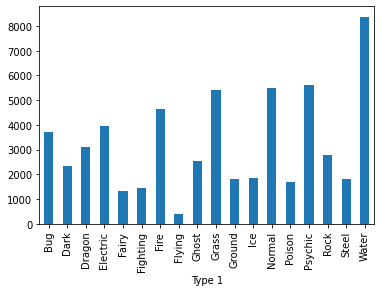

In [46]:
pokemon_new[pokemon_new['Sp. Atk'] > 0].groupby('Type 1')['Sp. Atk'].sum().plot(kind='bar')

By comparing the sum of the Sp. Atk. of the Pokemon in each of their primary element, we now learn that the **Water element pokemon has the most Sp. Atk**

Comparing the sum of Total of all the pokemon with their element

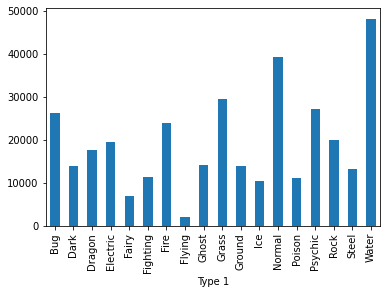

In [47]:
pokemon_new[pokemon_new['Total'] > 0].groupby('Type 1')['Total'].sum().plot(kind='bar')

By comparing the sum of the Total of the Pokemon in each of their primary element, we now learn that the **Water element pokemon has the most Total**

Comparing the sum of Defense of all the pokemon with their element

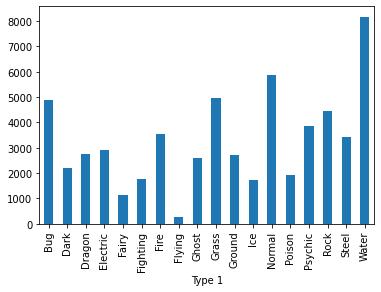

In [48]:
pokemon_new[pokemon_new['Defense'] > 0].groupby('Type 1')['Defense'].sum().plot(kind='bar')

By comparing the sum of the Defense of the Pokemon in each of their primary element, we now learn that the **Water element pokemon has the most Defense**

#Summary

In summary, from the objective set on the beginning of the notebook:

In this set of data, I will show top 10 pokemon which primary element or type 1:

1. Legendary pokemon with most Sp Atk.

> From the query of this data, we learn that the Legendary pokemon with the most Sp. Atk is Mega Mewtwo Y with 194 points of Sp. Atk

2. Non Legendary Pokemon with least Defense.

> From the query of this data, we learn that the Non Legendary pokemon with the least Defense is Blissey with 10 points of Defense

3. Gen 2 Pokemon with Most Total.

> From the query of this data, we learn that the Generation 2 pokemon with the most Total is Mega Tyranitar with 700 points of Total

4. The set of data will also shows the value of the most and least Total, Sp. Atk, and Defense.

> From the query of the data, we learn:

>1.   In all the data provided, the Min. of Total is 180 while the Max. is 780
>2.   In all the data provided, the Min. of Sp. Atk is 10 while the Max. is 194
>3.   In all the data provided, the Min. of Defense is 5 while the Max. is 230

5. And at the end, bar graphs will be shown, by comparing the sum of each Sp. Atk, Defense, and Total with pokemons primary element.

> From the bar graph generated by the code we learn that by comparing the sum of Sp. Atk, Defense, and Total with their primary element, we learn:

> 1. The Water element pokemon has the most Sp. Atk
> 2. The Water element pokemon has the most Total
> 3. The Water element pokemon has the most Defense

